In [88]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [92]:
# df = pd.read_csv('Facebook Data/predictions/Final_Predictions/News_Predictions.csv')
df = pd.read_csv('Facebook Data/predictions/Final_Predictions/cnn_Predictions.csv')

In [94]:
df.shape
# df['predictions'] = np.random.randint(0, 3, df.shape[0])

(580583, 4)

In [95]:
def convertTime(row):
    date = row.comment_published
    dateObj = datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date()
    return (dateObj.year,dateObj.month)
df['comment_published']=df.apply(convertTime,axis=1)

In [96]:
df2 = df.groupby('comment_published').comment_published.count().to_frame()

In [97]:
df2['toxicity'] = df[df['prediction'] > 0].groupby('comment_published').prediction.count()

In [98]:
df2['toxicity_rate'] = (df2['toxicity']/df2['comment_published'])*100

In [99]:
df2.head(20)

,comment_published,toxicity,toxicity_rate
comment_published,,,
"(2017, 1)",17960,2822,15.712695
"(2017, 2)",176336,25839,14.653276
"(2017, 3)",20832,1593,7.646889
"(2017, 4)",10642,1839,17.280586
"(2017, 5)",95970,15436,16.084193
"(2017, 6)",18693,2613,13.978495
"(2017, 7)",14566,2316,15.900041
"(2017, 8)",31564,2661,8.430490
"(2017, 9)",93010,10122,10.882701


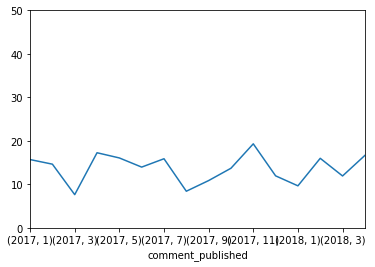

In [101]:
df2.toxicity_rate.plot()
plt.ylim(0,50)
plt.show()

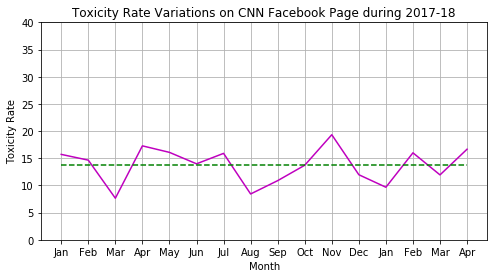

In [164]:
toxicity_rate = df2.toxicity_rate.values
average_toxicity = np.average(toxicity_rate) * np.ones(toxicity_rate.shape)
month = np.arange(0,toxicity_rate.shape[0])
plt.figure(figsize=(8,4))
plt.ylim(0,40)
my_xticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
plt.xticks(month, my_xticks)
plt.plot(month,toxicity_rate,'m',month,average_toxicity,'g--')
plt.grid()
plt.xlabel('Month')
plt.ylabel('Toxicity Rate')
plt.title('Toxicity Rate Variations on CNN Facebook Page during 2017-18')
plt.show()

In [74]:
193446+387137

580583

In [145]:
average_toxicity = np.average(toxicity_rate) * np.ones(toxicity_rate.shape)


In [146]:
average_toxicity

array([ 13.74138929,  13.74138929,  13.74138929,  13.74138929,
        13.74138929,  13.74138929,  13.74138929,  13.74138929,
        13.74138929,  13.74138929,  13.74138929,  13.74138929,
        13.74138929,  13.74138929,  13.74138929,  13.74138929])